# Dose response curve

In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
#Read the Excel file
dfDRC = pd.read_excel ('../data/DoseResponseCurveAssay.xlsx',   #create a pandas DataFrame from the filename with file path and extension shown!
                       sheet_name=0,   #use the first sheet (no need to specifically include this as we use the default setting)
                       header=0)   #our data has column names

print(dfDRC)   #print the DataFrame created

    [Drug 1] (ng/ml)  Response 1  [Drug 2] (ng/ml)  Response 2
0             0.0005       0.013            0.0003       0.007
1             0.0010       0.011            0.0006       0.007
2             0.0050       0.008            0.0060       0.011
3             0.0100       0.016            0.0120       0.030
4             0.0500       0.029            0.0300       0.024
5             0.1000       0.040            0.1200       0.049
6             0.5000       0.063            0.3000       0.051
7             1.5000       0.079            1.2000       0.066
8             3.0000       0.089            3.0000       0.077
9            10.0000       0.093           12.0000       0.098
10           30.0000       0.092           30.0000       0.087
11          100.0000       0.088          120.0000       0.084
12          300.0000       0.076          300.0000       0.100
13         1000.0000       0.078         1200.0000       0.097


In [3]:
#Calculate log10[Drug]
dfDRC['log[Drug 1]'] = np.log10(dfDRC['[Drug 1] (ng/ml)'])
dfDRC['log[Drug 2]'] = np.log10(dfDRC['[Drug 2] (ng/ml)'])

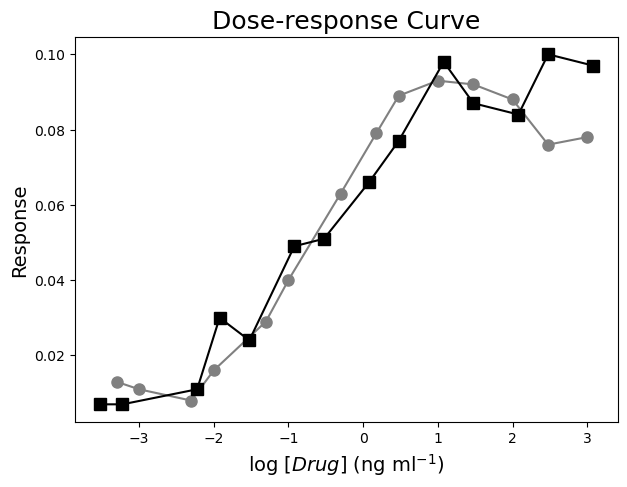

In [4]:
#Plot the data
plt.figure(figsize=(7,5))   #start a figure object

plt.plot(dfDRC['log[Drug 1]'], dfDRC['Response 1'],   #plot a set of x (= the log concentrations) ,y (=the responses) data
         marker='o', color='gray', markersize=8)   #use a round, gray marker with size 8

plt.plot(dfDRC['log[Drug 2]'], dfDRC['Response 2'],   #plot a set of x (= the log concentrations) ,y (=the responses) data, a different experiment
         marker='s', color='black', markersize=8)   #use a square, black marker with size 8

plt.title('Dose-response Curve', fontsize=18)   #title of graph
plt.xlabel('log $[Drug]$ (ng ml$^{-1}$)', fontsize=14)   #X-axis label
plt.ylabel('Response', fontsize=14)   #Y-axis label

plt.show()   #show the figure object

In [5]:
#Define the Hill function
def funcDRC(x, Rmin, Rmax, EC50, nHill):   #create the function
    """
    Return the Hill equation using Rmin, Rmax, EC50, and nHill

    Args:
        Rmin, the response effect in the absence of drug
        Rmax, the maximum effect
        EC50, the relative 50% effective dose or concentration
        nHill, the Hill exponent which describes the steepness of the curve
        
    Returns:
        the Hill equation function "a * x + b"
    """
    return Rmin + (Rmax-Rmin) / (1 + (((10**(np.log10(EC50)))/(10**x))**nHill))

In [6]:
#Combine all data
xDRC= pd.concat([dfDRC['log[Drug 1]'], dfDRC['log[Drug 2]']])
yDRC= pd.concat([dfDRC['Response 1'], dfDRC['Response 2']])

#Fit all data
paramsDRC, params_covarianceDRC = curve_fit(funcDRC,   #the function we try to fit to the data
                                            xDRC,   #the x values, the log10 concentrations
                                            yDRC,   #the y values, the responses
                                            [0.01, 0.12, 0.2, 1])   #the starting parameters, guesses from graph

In [7]:
#Report the fit parameters with standard errors
print("Rmin, the effect in the absence of drug = ", paramsDRC[0], "±", np.sqrt(np.diag(params_covarianceDRC))[0])
print("Rmax, the maximum effect = ", paramsDRC[1], "±", np.sqrt(np.diag(params_covarianceDRC))[1])
print("EC50 in (ng/ml), the relative 50% effective concentration = ", paramsDRC[2], "±", np.sqrt(np.diag(params_covarianceDRC))[2])
print("nHill, the Hill exponent = ", paramsDRC[3], "±", np.sqrt(np.diag(params_covarianceDRC))[3])

Rmin, the effect in the absence of drug =  0.008498737616173405 ± 0.003651549867015662
Rmax, the maximum effect =  0.09020671030749035 ± 0.002591463050546109
EC50 in (ng/ml), the relative 50% effective concentration =  0.18338955867846177 ± 0.048639840934997174
nHill, the Hill exponent =  0.7526341501947715 ± 0.13216413421539713


In [8]:
#Calculate the residuals
residDRC = yDRC - funcDRC(xDRC, *paramsDRC)   #calculate the residuals, the star in *paramsDRC unpacks the array so the two optimized parameter values become the second to fifth arguments (after the x-values) to the function

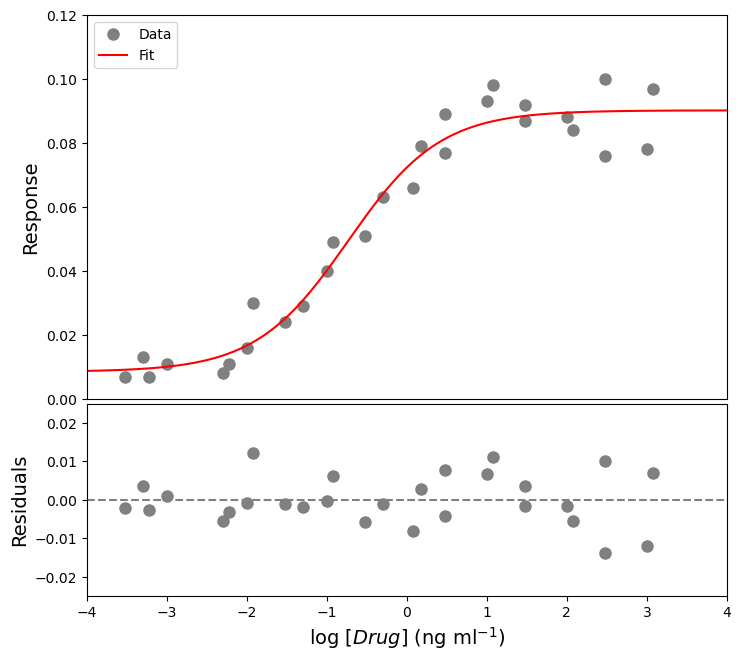

In [9]:
#Generate X-values to calculate the function
xvalues = np.linspace(-10,10,1000)   #create an array with 1000 evenly distributed elements between 0 (included) and -10 (included)

#Produce a combined graph
fig = plt.figure()   #to create a figure object

xlimits = [-4, 4]   #to make sure we use the same of the X-axis boundaries for both plots

ax1 = fig.add_axes([0.1, 0.51, 1, 0.8])   #to specify the coordinates, width and height of the top plot

ax2 = fig.add_axes([0.1, 0.1, 1, 0.4])   #to specify the coordinates, width and height of the bottom plot


ax1.plot(xDRC, yDRC,   #plot a set of x (= the log concentrations) ,y (=the responses) data
         marker='o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8 but no line 
         label='Data')   #add a legend label

ax1.plot(xvalues, funcDRC(xvalues, *paramsDRC),   #add the fitted curve to plot. Use the generated log10 concentrations as x-values. Use the fit parameters to calculate the y-values. The star in *paramsDRC unpacks the array so the two optimized parameter values become the second to fifth arguments (after the x-values) to the function.
         color="red",   #use a red line
         label='Fit')   #add a legend label 

ax1.axis(xlimits + [0, 0.12])   #sets the X-axis and Y-axis boundaries for the top plot
ax1.tick_params(axis='x', bottom=False, labelbottom=False)   #removes the ticks and tick labels on the X-axis for the top plot
ax1.set_ylabel('Response', fontsize=14)   #adds Y-axis title for the top plot
ax1.legend(loc='upper left')   #include legend

ax2.plot(xDRC, residDRC,     #plot a set of x (=the concentrations),y (= the residuals) data points
          marker='o', color='gray', linestyle='None', markersize=8)   #use a round, gray marker with size 8 but no line 

ax2.axhline(0, color='gray', linestyle="--")   #adds a horizontal line at y=0
ax2.axis(xlimits + [-0.025,0.025])   #sets the X-axis and Y-axis boundaries for the bottom plot
ax2.set_xlabel('log $[Drug]$ (ng ml$^{-1}$)', fontsize=14)   #adds X-axis title for the bottom plot, which is the same for the top plot
ax2.set_ylabel('Residuals', fontsize=14)   #adds Y-axis title for the bottom plot

plt.show()   #show the figure object

# Colorimetric assay

In [10]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [11]:
#Read the Excel file
dfCA = pd.read_excel ('../data/ColorimetricAssay.xlsx',   #create a pandas DataFrame from the filename with file path and extension shown
                    sheet_name=0,   #use the first sheet (no need to specifically include this as we use the default setting)
                    skiprows=3,   #skip the first three rows
                    skipfooter=3,   #skip the last three rows 
                    usecols=[6,7,8,9],   #only import columns 6 to 9 - be aware that column numbers start with zero!
                    header=None,   #our data does not have column names
                    names=['BSA-1','BSA-2', 'Sample-1', 'Sample-2'])   #use BSA-1, BSA-2, Sample-1, and Sample-2 as column names

print (dfCA)   #print the DataFrame created

   BSA-1  BSA-2  Sample-1  Sample-2
0  1.405  1.240    0.6570    0.6090
1  1.125  0.974    0.4322    0.3690
2  0.844  0.686    0.2870    0.2580
3  0.705  0.560    0.1090    0.1050
4  0.539  0.436    0.0560    0.0648
5  0.311  0.278    0.0586    0.0562
6  0.209  0.188    0.0682    0.0567
7  0.100  0.095    0.0589    0.0563


In [12]:
#Insert a column containing the concentrations of the standards
x1 = [2000, 1500, 1000, 750, 500, 250, 125, 0]   #create a list with integers containing the concentrations

dfCA.insert(0, '[BSA]', x1)   #insert the column at index 0 (i.e. make it the first column) in dfCA, name the column [BSA], and fill it with the data provided by x1

print(dfCA)   #print the DataFrame created

   [BSA]  BSA-1  BSA-2  Sample-1  Sample-2
0   2000  1.405  1.240    0.6570    0.6090
1   1500  1.125  0.974    0.4322    0.3690
2   1000  0.844  0.686    0.2870    0.2580
3    750  0.705  0.560    0.1090    0.1050
4    500  0.539  0.436    0.0560    0.0648
5    250  0.311  0.278    0.0586    0.0562
6    125  0.209  0.188    0.0682    0.0567
7      0  0.100  0.095    0.0589    0.0563


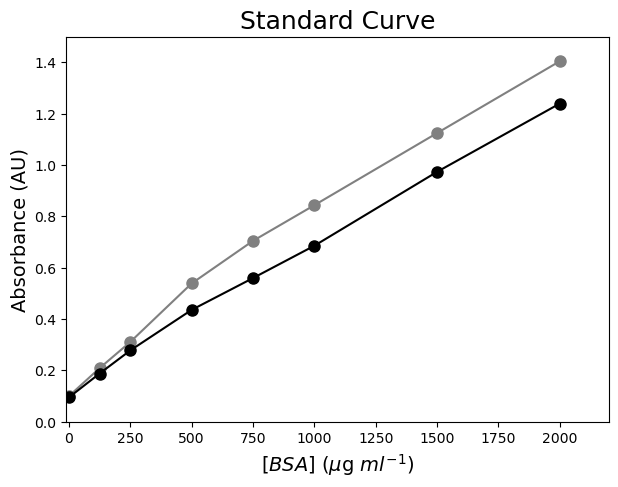

In [13]:
#Plot the data
plt.figure(figsize=(7,5))   #start a figure object

plt.plot(dfCA['[BSA]'], dfCA['BSA-1'],   #plot a set of x (= the concentrations),y (= the measured absorbances) data points
         marker='o', color='gray', markersize=8)   #use a round, gray marker with size 8

plt.plot(dfCA['[BSA]'], dfCA['BSA-2'],   #plot another set of x (= the concentrations),y (= the measured absorbances) data points
         marker='o', color='black', markersize=8)   #use a round, black marker with size 8

plt.title('Standard Curve', fontsize=18)   #title of graph
plt.xlabel('$[BSA]$ ($\mu$g $ml^{-1}$)', fontsize=14)   #X-axis label
plt.ylabel('Absorbance (AU)', fontsize=14)   #Y-axis label
plt.axis([-10, 2200, 0, 1.5])   #axis boundaries, in this case from -10 to 2200 for the X-axis and 0 to 1.5 for the Y-axis

plt.show()   #show the figure object

In [14]:
#Calculate mean and stdev
dfCA['BSA-mean'] = dfCA.iloc[:,1:3].mean(axis=1)   #we use axis 1 to get the mean of the elements of one row, we use columns 1 = BSA-1 and 2 = BSA-2, represented by [1:3]. The result is added to a new column.
dfCA['BSA-std'] = dfCA.iloc[:,1:3].std(axis=1)   #we use axis 1 to get the standard deviation of the elements of one row, we use columns 1 = BSA-1 and 2 = BSA-2, represented by [1:3]. The result is added to a new column.

print(dfCA)   #print the DataFrame created

   [BSA]  BSA-1  BSA-2  Sample-1  Sample-2  BSA-mean   BSA-std
0   2000  1.405  1.240    0.6570    0.6090    1.3225  0.116673
1   1500  1.125  0.974    0.4322    0.3690    1.0495  0.106773
2   1000  0.844  0.686    0.2870    0.2580    0.7650  0.111723
3    750  0.705  0.560    0.1090    0.1050    0.6325  0.102530
4    500  0.539  0.436    0.0560    0.0648    0.4875  0.072832
5    250  0.311  0.278    0.0586    0.0562    0.2945  0.023335
6    125  0.209  0.188    0.0682    0.0567    0.1985  0.014849
7      0  0.100  0.095    0.0589    0.0563    0.0975  0.003536


In [15]:
#Define a line
def funcline(x, a, b):   #create the function
    """
    Return a line using slope and intercept

    Args:
        the slope, a
        the intercept, b
        
    Returns:
        the line function "a * x + b"
    """
    return a * x + b
    
#Define a quadratic curve
def funcpoly2(x, a, b, c):   #create the function
    """
    Return a quadratic curve using the first and second coefficients, a and b, and constant, c

    Args:
        the first coefficient, a
        the second coefficient, b
        the constant, c
        
    Returns:
        the quadratic curve function "a * x^2 + b * x + c"
    """
    return a * x**2 + b * x + c

In [16]:
#Fit with a line
params1, params_covariance1 = curve_fit(funcline,   #the line function we try to fit to the data
                                        dfCA['[BSA]'],   #the x values, the concentrations
                                        dfCA['BSA-mean'],   #the y values, the measured absorbances
                                        [0.1, 0.1],   #the starting parameters for a (=the slope) and b (=the intercept)
                                        sigma=dfCA['BSA-std'],   #the standard deviations used for weighted fitting
                                        absolute_sigma=True)   #use sigma (=the standard deviations) in an absolute sense

#Fit with a quadratic curve
params2, params_covariance2 = curve_fit(funcpoly2,   #the quadratic curve function we try to fit to the data
                                        dfCA['[BSA]'],   #the x values, the concentrations
                                        dfCA['BSA-mean'],   #the y values, the measured absorbances
                                        [0.1, 0.1, 0.1],   #the starting parameters for a (=the first coefficient), b (=the second coefficient), and c (=the constant)
                                        sigma=dfCA['BSA-std'],   #the standard deviations used for weighted fitting
                                        absolute_sigma=True)   #use sigma (=the standard deviations) in an absolute sense

In [17]:
#Report the fit parameters with standard errors for the line function
print("Slope, a = ", params1[0], "±", np.sqrt(np.diag(params_covariance1))[0])
print("Intercept, b = ", params1[1], "±", np.sqrt(np.diag(params_covariance1))[1])

#Report the fit parameters with standard errors for the quadratic function
print("First coefficient, a =", params2[0], "±", np.sqrt(np.diag(params_covariance2))[0])
print("Second coefficient, b = ", params2[1], "±", np.sqrt(np.diag(params_covariance2))[1])
print("Constant, c = ", params2[2], "±", np.sqrt(np.diag(params_covariance2))[2])

Slope, a =  0.0006752911504972768 ± 3.4711561818850496e-05
Intercept, b =  0.09893123662572621 ± 0.0034483918891948778
First coefficient, a = -1.0251269659569087e-07 ± 4.918443551362741e-08
Second coefficient, b =  0.000804959044796896 ± 7.124165832527459e-05
Constant, c =  0.097629671857749 ± 0.003504479565086863


In [18]:
#Calculate the residuals for the line function
resid1 = dfCA['BSA-mean'] - funcline(dfCA['[BSA]'], *params1)   #calculate the residuals, the star in _*params1_ unpacks the array so the two optimized parameter values become the second and third arguments (after the x-values) to the function

#Calculate the residuals for the quadratic function
resid2 = dfCA['BSA-mean'] - funcpoly2(dfCA['[BSA]'], *params2)   #calculate the residuals, the star in _*params2_ unpacks the array so the two optimized parameter values become the second, third, and fourth arguments (after the x-values) to the function

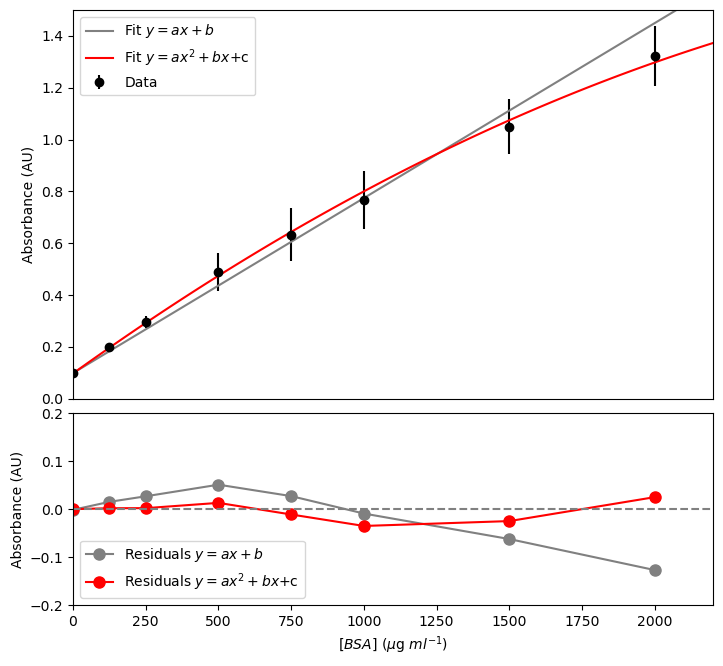

In [19]:
#Generate X-values to calculate the function
xvalues = np.linspace(0, 2200, 100)   #create an array with 100 evenly distributed elements between 0 (included) and 2200 (included)

#Produce a combined graph
fig = plt.figure()   #to create a figure object

xlimits = [0, 2200]   #to make sure we use the same of the X-axis boundaries for both plots

ax1 = fig.add_axes([0.1, 0.53, 1, 0.81])   #to specify the coordinates, width and height of the top plot

ax2 = fig.add_axes([0.1, 0.1, 1, 0.4])   #to specify the coordinates, width and height of the bottom plot

ax1.errorbar(dfCA['[BSA]'], dfCA['BSA-mean'],   #plot a set of x (= the concentrations),y (= the mean absorbances) data points
             yerr=dfCA['BSA-std'],   #use an error bar (= the standard deviations)
             fmt='o', color='black', ecolor='black', #use a round, black marker with size 8
             label='Data')   #add a legend label

ax1.plot(xvalues, funcline(xvalues, *params1),   #add the fitted line to plot. Use the generated BSA concentrations as x-values. Use the fitted parameters to calculate the y-values. The star in _*params1_ unpacks the array so the two optimized parameter values become the second and third arguments (after the x-values) to the function.
         color="gray", linestyle='-',   #use a gray line
         label='Fit $y=ax+b$')   #add a legend label

ax1.plot(xvalues, funcpoly2(xvalues, *params2),   #add the fitted quadratic curve to plot. Use the generated BSA concentrations as x-values. Use the fitted parameters to calculate the y-values. The star in _*params2_ unpacks the array so the two optimized parameter values become the second, third, and fourth arguments (after the x-values) to the function.
         color="red", linestyle='-',   #use a red line
         label='Fit $y=ax^2+bx$+c')   #add a legend label

ax1.axis(xlimits + [0, 1.5])   #sets the X-axis and Y-axis boundaries for the top plot
ax1.tick_params(axis='x', bottom=False, labelbottom=False)   #removes the ticks and tick labels on the X-axis for the top plot
ax1.set_ylabel('Absorbance (AU)')   #adds Y-axis title for the top plot
ax1.legend(loc='upper left')   #include legend

ax2.plot(dfCA['[BSA]'], resid1,   #plot a set of x (= the concentrations),y (= the residuals for y=ax) data points
         marker='o', color='gray', linestyle='-', markersize=8,   #use gray datapoints size 8 and a line
         label='Residuals $y=ax+b$')   #add a legend label

ax2.plot(dfCA['[BSA]'], resid2,   #plot a set of x (= the concentrations),y (= the residuals for y=ax^2+bx+c) data points
         marker='o', color='red', linestyle='-', markersize=8,   #use red datapoints size 8 and a line
         label='Residuals $y=ax^2+bx$+c')   #add a legend label

ax2.axhline(0, color='gray', linestyle="--")   #adds a horizontal line at y=0
ax2.axis(xlimits + [-0.2,0.2])   #sets the X-axis and Y-axis boundaries for the bottom plot
ax2.set_xlabel('$[BSA]$ ($\mu$g $ml^{-1}$)')   #adds X-axis title for the bottom plot, which is the same for the top plot
ax2.set_ylabel('Absorbance (AU)')   #adds Y-axis title for the bottom plot
ax2.legend(loc='lower left')   #include legend

plt.show()   #show the figure object

In [20]:
#Calculate the concentration for each of the dilution factors
def solcalc(y, a, b, c):   #create the function
    """
    Solve the quadratic equation for x when y is given using the quadratic formula

    Args:
        the first coefficient, a
        the second coefficient, b
        the constant, c
        
    Returns:
        the solution x-values of a quadratic equation with y given
    """
    return (-b + np.sqrt(b**2 - 4 * a * (c-y)))/(2 * a)

dfCA['Solution-1'] = dfCA['Sample-1'].apply(solcalc, args=params2.tolist())   #apply the function that calculates the solution x-values of a quadratic equation with y given to the Sample-1 absorbances. Use the fitted parameters (converted from NumPy array to list) as arguments for the function (after the y-values). 
dfCA['Solution-2'] = dfCA['Sample-2'].apply(solcalc, args=params2.tolist())   #apply the function that calculates the solution x-values of a quadratic equation with y given to the Sample-2 absorbances. Use the fitted parameters (converted from NumPy array to list) as arguments for the function (after the y-values). 

In [21]:
#Take the dilution factors into account
dfCA['DF'] = [2.5, 5, 10, 20, 0, 0, 0, 0]   #add a column containing the dilution factors
dfCA['Concentration-1'] = dfCA['Solution-1'] * dfCA['DF']   #add a column with the calculated values for undiluted samples for 1
dfCA['Concentration-2'] = dfCA['Solution-2'] * dfCA['DF']   #add a column with the calculated values for undiluted samples for 2
print(dfCA)   #print the DataFrame

   [BSA]  BSA-1  BSA-2  Sample-1  Sample-2  BSA-mean   BSA-std  Solution-1  \
0   2000  1.405  1.240    0.6570    0.6090    1.3225  0.116673  770.512554   
1   1500  1.125  0.974    0.4322    0.3690    1.0495  0.106773  440.328532   
2   1000  0.844  0.686    0.2870    0.2580    0.7650  0.111723  242.759724   
3    750  0.705  0.560    0.1090    0.1050    0.6325  0.102530   14.150852   
4    500  0.539  0.436    0.0560    0.0648    0.4875  0.072832  -51.380310   
5    250  0.311  0.278    0.0586    0.0562    0.2945  0.023335  -48.190776   
6    125  0.209  0.188    0.0682    0.0567    0.1985  0.014849  -36.391799   
7      0  0.100  0.095    0.0589    0.0563    0.0975  0.003536  -47.822589   

   Solution-2    DF  Concentration-1  Concentration-2  
0  697.174408   2.5      1926.281385      1742.936019  
1  352.991523   5.0      2201.642660      1764.957615  
2  204.556761  10.0      2427.597239      2045.567610  
3    9.166854  20.0       283.017031       183.337089  
4  -40.574617   0

In [22]:
#Calculate the overal concentration
dfCAnew=dfCA.iloc[0:3,-2:]   #create a new DataFrame containing all values you want to calculate the mean and standard deviation for
print(dfCAnew)   #print the new DataFrame 

print(np.array(dfCAnew).mean())   #convert the new DataFrame into a NumPy array and calulcate the mean of all elements
print(np.array(dfCAnew).std())   #convert the new DataFrame into a NumPy array and calulcate the standard deviation of all elements

   Concentration-1  Concentration-2
0      1926.281385      1742.936019
1      2201.642660      1764.957615
2      2427.597239      2045.567610
2018.1637547413357
241.6461886993642


# Redox potential

In [23]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [24]:
#Read the Excel file
dfRP = pd.read_excel ('../data/RedoxPotential.xlsx',   #create a pandas DataFrame from the filename with file path and extension shown
                    sheet_name=0,   #use the first sheet (no need to specifically include this as we use the default setting)
                    header=0)   #our data has column names

print(dfRP)   #print the DataFrame created

    A550nm (AU)  [Ferricyanide] (mM)  [Ferrocyanide] (mM)  \
0         0.264            10.000000             0.000000   
1         0.738             0.000000             0.000000   
2         0.433             0.024938             9.975062   
3         0.374             0.049751             9.950249   
4         0.342             0.074442             9.925558   
5         0.326             0.099010             9.900990   
6         0.315             0.123457             9.876543   
7         0.307             0.147783             9.852217   
8         0.302             0.196078             9.803922   
9         0.296             0.243902             9.756098   
10        0.289             0.291262             9.708738   

    [Sodium dithionite] (mM)  
0                          0  
1                         10  
2                          0  
3                          0  
4                          0  
5                          0  
6                          0  
7                  

In [25]:
#Calculate log10([Ferrocyanide]/[Ferricyanide])

dfRP['Log10([FerroCN]/[FerriCN])'] = np.log10((dfRP.iloc[2:,2] / dfRP.iloc[2:,1]))   #Calculate log10([Ferrocyanide]/[Ferricyanide]), but not for the first two rows as specified using iloc[start_index_row:(to end row), index_column] = [2:,2] and [2:,1] with column 1 (we start counting from 0!) = [Ferricyanide] and column 2 = [Ferrocyanide]. Store the information in a new column called 'Log10([FerroCN]/[FerriCN])'.

print(dfRP)   #print the DataFrame created

    A550nm (AU)  [Ferricyanide] (mM)  [Ferrocyanide] (mM)  \
0         0.264            10.000000             0.000000   
1         0.738             0.000000             0.000000   
2         0.433             0.024938             9.975062   
3         0.374             0.049751             9.950249   
4         0.342             0.074442             9.925558   
5         0.326             0.099010             9.900990   
6         0.315             0.123457             9.876543   
7         0.307             0.147783             9.852217   
8         0.302             0.196078             9.803922   
9         0.296             0.243902             9.756098   
10        0.289             0.291262             9.708738   

    [Sodium dithionite] (mM)  Log10([FerroCN]/[FerriCN])  
0                          0                         NaN  
1                         10                         NaN  
2                          0                    2.602060  
3                          0   

In [26]:
#Calculate log10([FerrocytC]/[FerricytC]) using a function
def funclog10_FerrocytC_FerricytC(Aobs, Aferri, Aferro):   #create the function
    """
    Calculate log10([FerrocytC]/[FerricytC]) = log10((Aobs - Aferri)/(Aferro - Aobs))

    Args:
        Aobs in AU = the observed signal for a mixture of ferro- and ferricyt c. The column containing the absorbances at 550 nm (in AU) in the presence of 25 to 300 μM ferricyanide and 9.975 to 9.700 mM ferrocyanide.
        Aferri in AU = the observed signal for fully oxidized cyt c, i.e. ferricyt c. The absorbance at 550 nm (in AU) in the presence of 10 mM potassium ferricyanide.
        Aferro in AU = the observed signal for fully reduced cyt c, i.e. ferrocyt c. The absorbance at 550 nm (in AU) in the presence of 10 mM sodium dithionite.

    Returns:
        log10([FerrocytC]/[FerricytC])
    """
    log10FerrocytCFerricytC = np.log10((Aobs-Aferri) / (Aferro-Aobs))
    return log10FerrocytCFerricytC

dfRP['Log10([FerrocytC]/[FerricytC])'] = dfRP.iloc[2:,0].apply(funclog10_FerrocytC_FerricytC,   #Apply the function with arguments Aferri and Aferro (after Aobs) to our data set. Use iloc[start_index_row:(to end row), index_column] = [2:,0] to select Aobs for the data set but not for the first two rows. Store the information in a new column called 'Log10([FerrocytC]/[FerricytC])'.
                                                                   args=(dfRP.iloc[0,0], dfRP.iloc[1,0]))   #Use iloc[index_row,index_column] to select Aferri = [0,0] and Aferro = [1,0] for the data set. 

print(dfRP)   #print the DataFrame created

    A550nm (AU)  [Ferricyanide] (mM)  [Ferrocyanide] (mM)  \
0         0.264            10.000000             0.000000   
1         0.738             0.000000             0.000000   
2         0.433             0.024938             9.975062   
3         0.374             0.049751             9.950249   
4         0.342             0.074442             9.925558   
5         0.326             0.099010             9.900990   
6         0.315             0.123457             9.876543   
7         0.307             0.147783             9.852217   
8         0.302             0.196078             9.803922   
9         0.296             0.243902             9.756098   
10        0.289             0.291262             9.708738   

    [Sodium dithionite] (mM)  Log10([FerroCN]/[FerriCN])  \
0                          0                         NaN   
1                         10                         NaN   
2                          0                    2.602060   
3                          

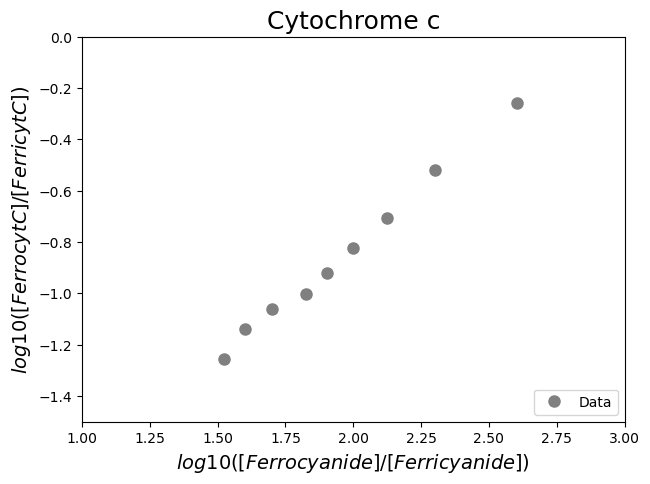

In [27]:
#Plot the data
plt.figure(figsize=(7,5))   #start a figure object

plt.plot(dfRP.iloc[2:,4], dfRP.iloc[2:,5],   #plot a set of x (= Log10([FerroCN]/[FerriCN]), i.e. column 4),y (= Log10([FerrocytC]/[FerricytC]), i.e. column 5) data points, but do not include the first two rows as specified using iloc[start_index_row:(to end row), index_column] = [2:,4] and [2:,5]
         marker='o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8; use no line
         label='Data')   #add a legend label
       
plt.title('Cytochrome c', fontsize=18)   #title of graph
plt.xlabel('$log10([Ferrocyanide]/[Ferricyanide]$)', fontsize=14)   #X-axis label
plt.ylabel('$log10([FerrocytC]/[FerricytC])$', fontsize=14)   #Y-axis label
plt.axis([1, 3, -1.5, 0])   #axis boundaries, in this case from 1 to 3 for the X-axis and -1.5 to 0 for the Y-axis
plt.legend(loc='lower right')   #show legend in lower right corner

plt.show()   #show the figure object

In [28]:
#Define a line
def funcline(x, a, b):   #create the function
    """
    Return a line using slope and intercept

    Args:
        the slope, a
        the intercept, b
        
    Returns:
        the line function "a * x + b"
    """
    return a * x + b

#Fit the data with a line
paramsCraig, params_covCraig = curve_fit(funcline,   #the line function we try to fit to the data
                                         dfRP.iloc[2:,4],   #the x values, Log10([FerroCN]/[FerriCN]), but not the first two rows
                                         dfRP.iloc[2:,5],   #the y values, Log10([FerrocytC]/[FerricytC]), but not the first two rows
                                         [1, -2])   #the starting parameters for a (=the slope) and b (=the intercept)

#Report the fit parameters with standard errors for the line function
print("Slope, a = ", paramsCraig[0], "±", np.sqrt(np.diag(params_covCraig))[0])
print("Intercept, b = ", paramsCraig[1], "±", np.sqrt(np.diag(params_covCraig))[1])

Slope, a =  0.9092069993196864 ± 0.02311791055989715
Intercept, b =  -2.6290200322892794 ± 0.04578505242299154


In [29]:
#Calculate the residuals
resid = dfRP.iloc[2:,5] - funcline(dfRP.iloc[2:,4], *paramsCraig)   #calculate the residuals, the star in _*paramsCraig_ unpacks the array so the two optimized parameter values become the second and third arguments (after the x-values) to the function

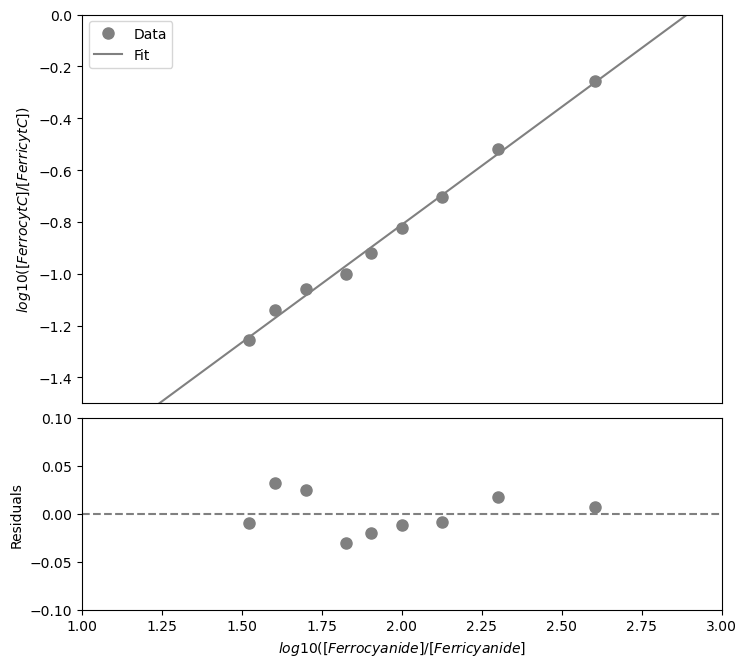

In [33]:
#Generate X-values to calculate the function
xvalues = np.linspace(1, 3, 100)   #create an array with 100 evenly distributed elements between 0 (included) and 3 (included)

#Produce a combined graph
fig = plt.figure()   #to create a figure object

xlimits = [1, 3]   #to make sure we use the same of the X-axis boundaries for both plots

ax1 = fig.add_axes([0.1, 0.53, 1, 0.81])   #to specify the coordinates, width and height of the top plot

ax2 = fig.add_axes([0.1, 0.1, 1, 0.4])   #to specify the coordinates, width and height of the bottom plot

ax1.plot(dfRP.iloc[2:,4], dfRP.iloc[2:,5],   #plot a set of x (= Log10([FerroCN]/[FerriCN]), i.e. column 4),y (= Log10([FerrocytC]/[FerricytC]), i.e. column 5) data points, but do not include the first two rows as specified using iloc[start_index_row:(to end row), index_column] = [2:,4] and [2:,5]
         marker='o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8; use no line
         label='Data')   #add a legend label

ax1.plot(xvalues, funcline(xvalues, *paramsCraig),   #add the fitted line to plot. Use the generated Log10([FerroCN]/[FerriCN] array as x-values. Use the fitted parameters to calculate the y-values. The star in _*paramsCraig_ unpacks the array so the two optimized parameter values become the second and third arguments (after the x-values) to the function.
         color="gray", linestyle='-',   #use a gray line
         label='Fit')   #add a legend label

ax1.axis(xlimits + [-1.5, 0])   #sets the X-axis and Y-axis boundaries for the top plot
ax1.tick_params(axis='x', bottom=False, labelbottom=False)   #removes the ticks and tick labels on the X-axis for the top plot
ax1.set_ylabel('$log10([FerrocytC]/[FerricytC])$')   #adds Y-axis title for the top plot
ax1.legend(loc='upper left')   #include legend

ax2.plot(dfRP.iloc[2:,4], resid,   #plot a set of x (= Log10([FerroCN]/[FerriCN]),y (= the residuals for y=ax+b) data points
         marker='o', color='gray', linestyle='None', markersize=8)   #use gray datapoints size 8 and no line
         
ax2.axhline(0, color='gray', linestyle="--")   #adds a horizontal line at y=0
ax2.axis(xlimits + [-0.1,0.1])   #sets the X-axis and Y-axis boundaries for the bottom plot
ax2.set_xlabel('$log10([Ferrocyanide]/[Ferricyanide]$')   #adds X-axis title for the bottom plot, which is the same for the top plot
ax2.set_ylabel('Residuals')   #adds Y-axis title for the bottom plot

plt.show()   #show the figure object

In [31]:
#Define the function
def funcmidredpot(a, b, da, db):   #create the function
    """
    Return the midpoint redox potential with uncertainty

    Args:
        the slope, a
        the standard deviation of the slope, da
        the intercept, b
        the standard deviation of the intercept, db
        
    Returns:
        the midpoint redox potential 
        the uncertainty of the midpoint redox potential, using error propagation rules
    """
    rp = 0.430 - 0.059 * (-b / a)
    drp = 0.059 * np.sqrt((a**2 * db**2 + b**2 * da**2)/(a**4))
    
    return rp, drp

#Apply the function
midredpot = funcmidredpot(*paramsCraig, *np.sqrt(np.diag(params_covCraig)))    #Use the fitted parameters with standard deviations (the stars unpack both arrays) as arguments for the function. 

print("The midpoint redox potential of cytochrome c is", midredpot[0], "+/-", midredpot[1], "V. The uncertainty is one standard deviation and is derived from the errors on the fit.")   #Print the result of the experiment.

The midpoint redox potential of cytochrome c is 0.2593983856029154 +/- 0.005257729412117667 V. The uncertainty is one standard deviation and is derived from the errors on the fit.


# Thermal shift assay